# Random Forest



In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [30]:
%store -r data
data

,utc_timestamp,wind_generation_actual,wind_capacity,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual,temperature,year,month,wind_generation_actual_mean_lag2,wind_generation_actual_mean_lag3,wind_generation_actual_mean_lag7,wind_generation_actual_std_lag2,wind_generation_actual_std_lag3,wind_generation_actual_std_lag7
0,2014-12-31 00:00:00+00:00,0.0,27913.000000,667.000000,0.0,27246.000000,0.0,-0.057542,2014,12,266913.023823,266817.753286,266841.053197,77939.006866,97082.475266,127267.548419
1,2015-01-01 00:00:00+00:00,325165.0,27913.541667,667.000000,12297.0,27246.541667,312868.0,-0.295958,2015,1,0.000000,0.000000,0.000000,77939.006866,97082.475266,127267.548419
2,2015-01-02 00:00:00+00:00,603554.0,27926.000000,667.000000,10533.0,27259.000000,593022.0,1.619958,2015,1,162582.500000,162582.500000,162582.500000,229926.376505,229926.376505,229926.376505
3,2015-01-03 00:00:00+00:00,462955.0,27926.000000,667.000000,12125.0,27259.000000,450829.0,0.851458,2015,1,464359.500000,309573.000000,309573.000000,196850.749708,302078.947590,302078.947590
4,2015-01-04 00:00:00+00:00,385023.0,27926.541667,667.125000,11500.0,27259.375000,373525.0,0.493625,2015,1,533254.500000,463891.333333,347918.500000,99418.506328,139196.861927,258294.347336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-27 00:00:00+00:00,146590.0,50427.000000,5735.000000,40135.0,44692.000000,106453.0,1.327167,2019,12,213194.000000,293860.000000,428006.714286,113780.552161,161226.603552,178293.300669
1823,2019-12-28 00:00:00+00:00,159126.0,50427.291667,5735.291667,66626.0,44692.000000,92505.0,-1.441167,2019,12,139664.500000,190992.666667,355604.571429,9794.136026,89172.331081,174369.098096
1824,2019-12-29 00:00:00+00:00,349839.0,50434.750000,5742.000000,121886.0,44692.750000,227954.0,-1.314500,2019,12,152858.000000,146151.666667,317021.571429,8864.290609,13198.959972,184929.477793
1825,2019-12-30 00:00:00+00:00,669271.0,50452.000000,5742.000000,133426.0,44710.000000,535847.0,0.510208,2019,12,254482.500000,218518.333333,307030.857143,134854.455560,113899.631011,180283.892782


In [31]:
train = data[data.year < 2019]
valid = data[data.year >= 2019]

In [32]:
train.columns
%store -r data_x
features = data_x.columns


In [33]:
rfregressor = RandomForestRegressor()
rfregressor.fit(train[features], train['wind_generation_actual'])
rfforecast = rfregressor.predict(valid[features])
valid["Forecast_RF"] = rfforecast

/tmp/ipykernel_253285/2610394966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Forecast_RF"] = rfforecast


<AxesSubplot:>

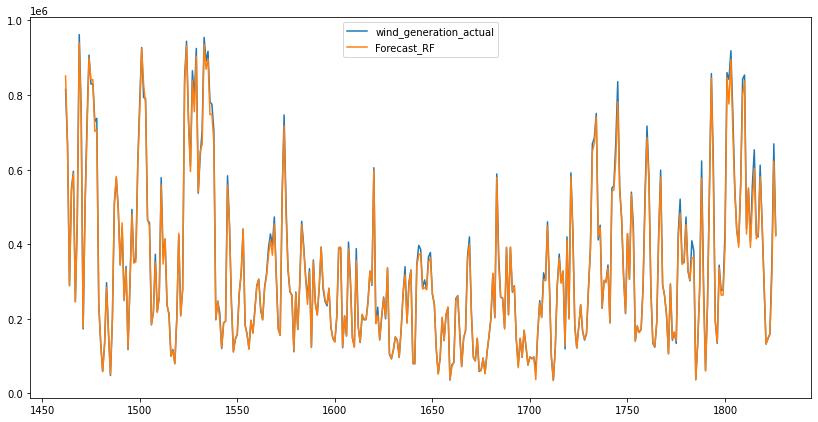

In [34]:
valid[["wind_generation_actual", "Forecast_RF"]].plot(figsize=(14, 7))

In [37]:
rf_rmse = np.sqrt(mean_squared_error(valid["wind_generation_actual"], valid.Forecast_RF))
rf_mae = mean_absolute_error(valid["wind_generation_actual"], valid.Forecast_RF)

print("RMSE of Random Forests:", rf_rmse)
print("\nMAE of Random Forests:", rf_mae)

RMSE of Random Forests: 13935.332502681276

MAE of Random Forests: 8219.58802739726
